# Unsupervised Learning

Clustering

In [37]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [38]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/datasets/wine-clustering.csv')

In [39]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [41]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [42]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [43]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [44]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Visualize the data

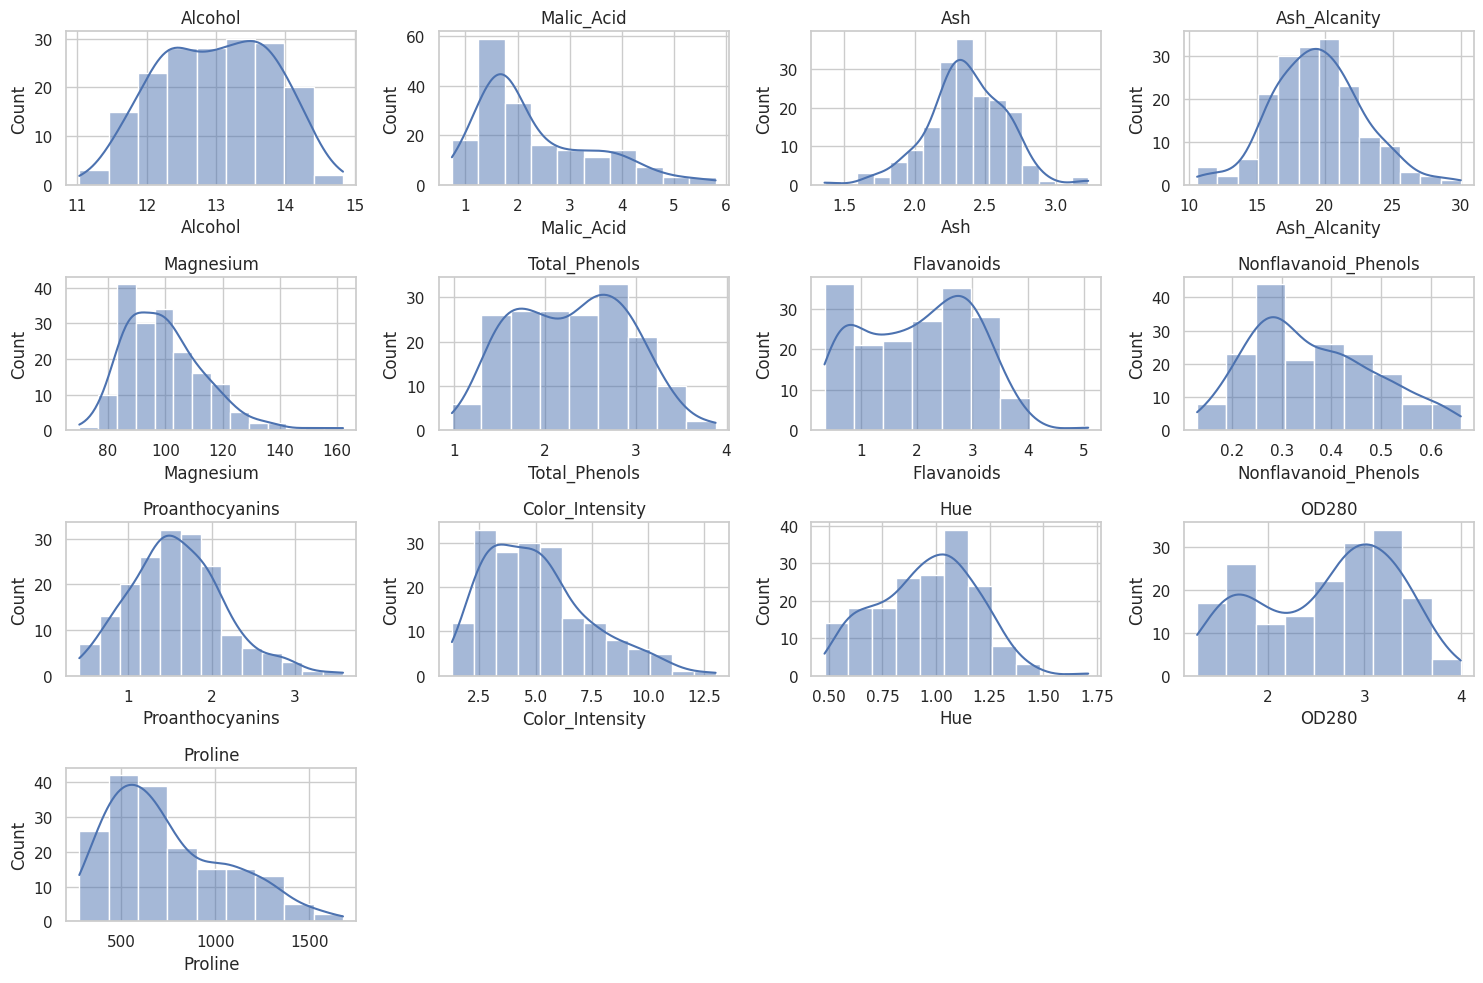

<Figure size 1500x1000 with 0 Axes>

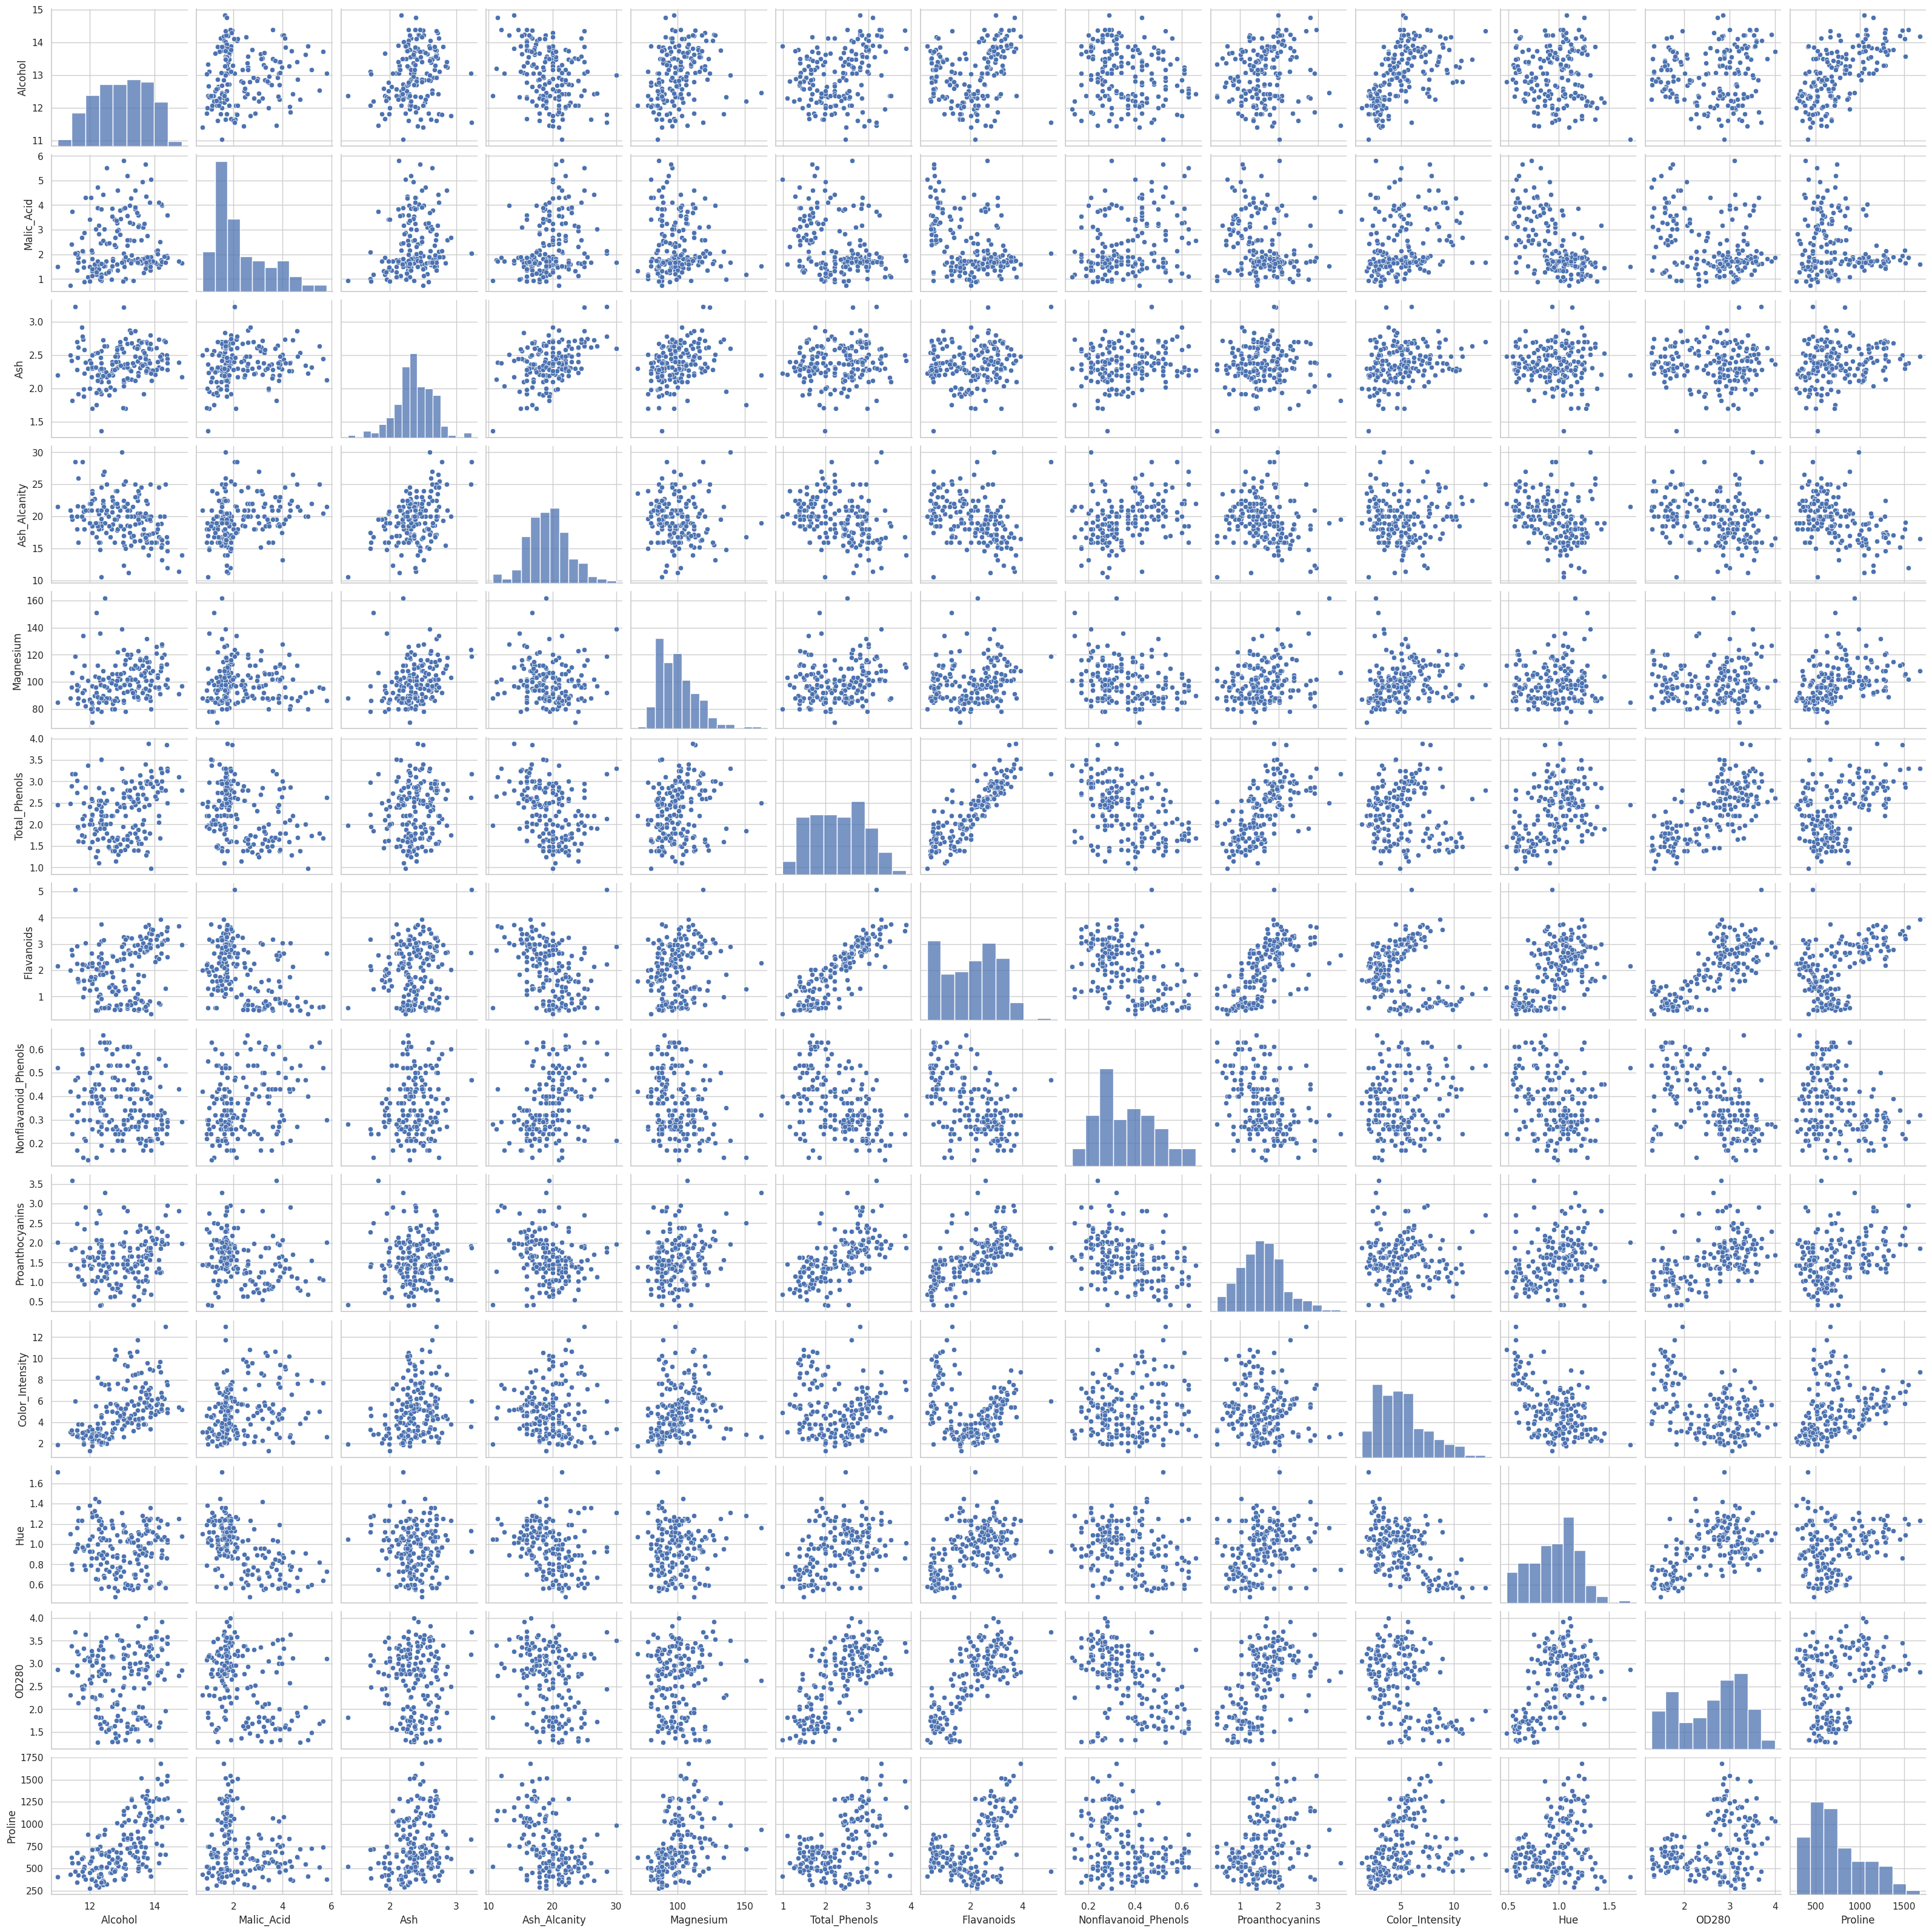

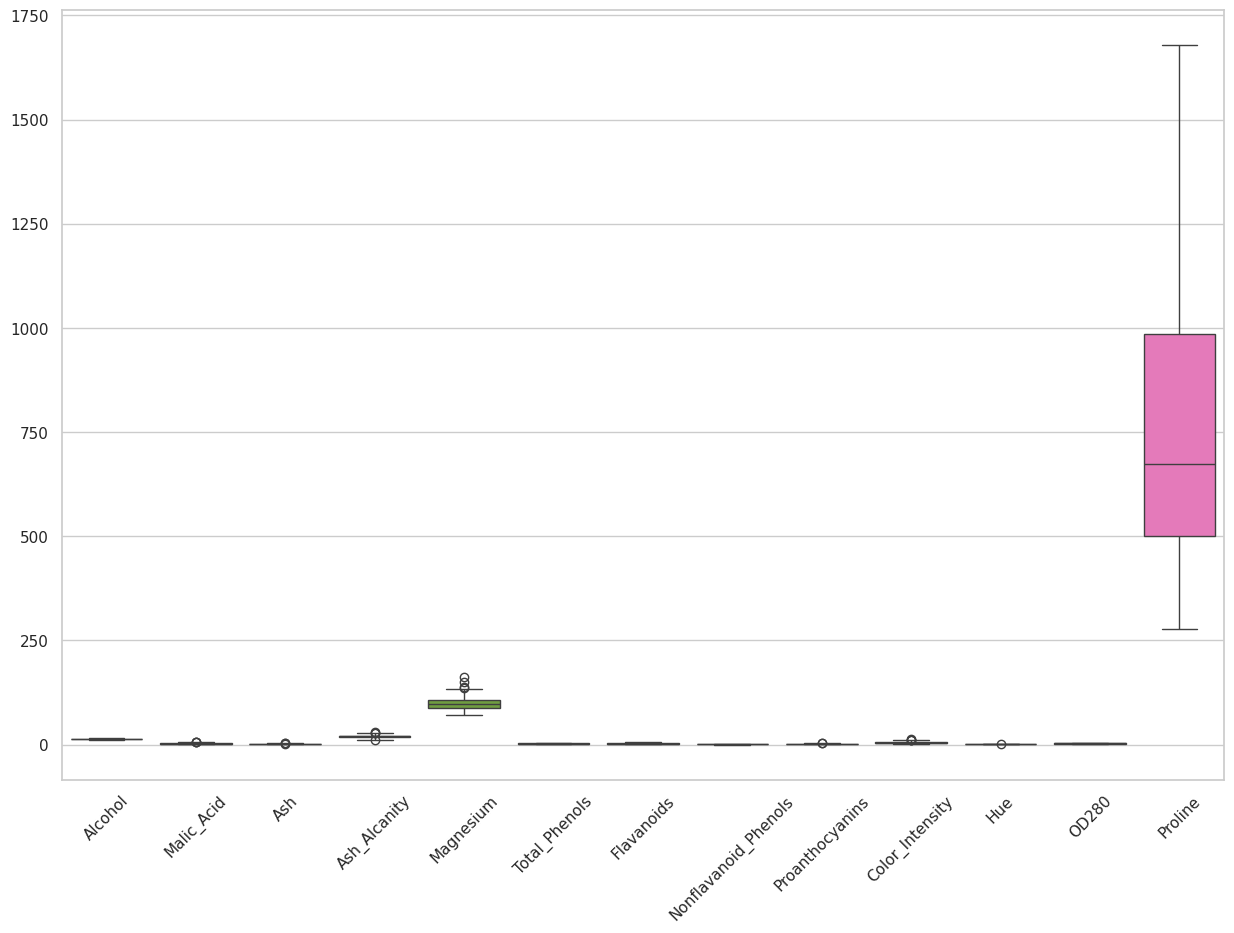

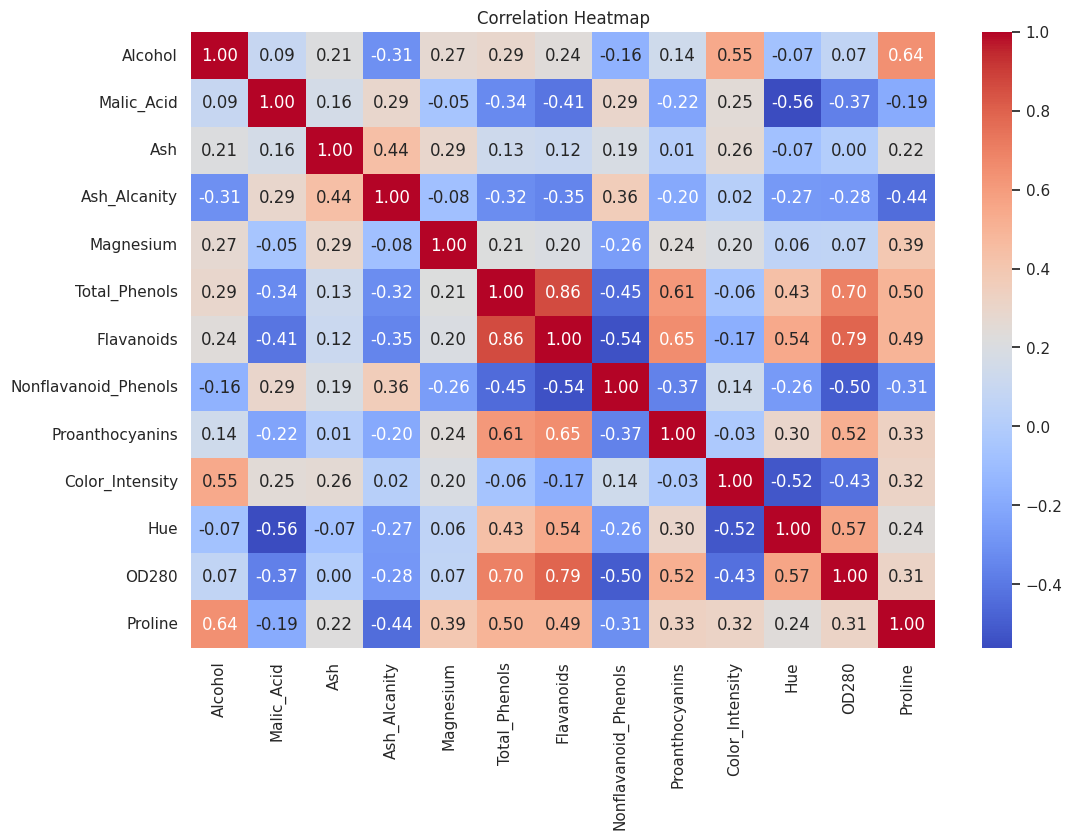

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.pairplot(df)
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 1. K-Means

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [47]:
X = df.values
X_train, X_temp, _, _ = train_test_split(X, X, test_size=0.4, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

Find the optimal number of clusters

In [48]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = np.argmax(silhouette_scores) + 2

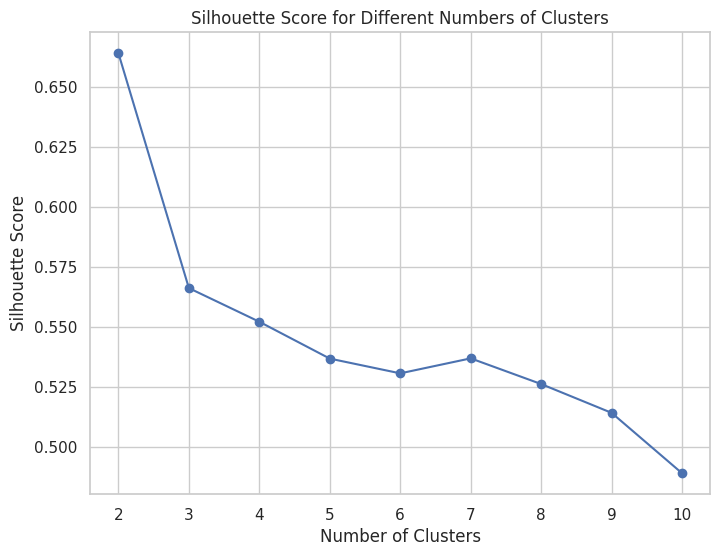

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [50]:
print(optimal_n_clusters)

2


Feed the model

In [51]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
train_cluster_labels = kmeans.fit_predict(X_train)
val_cluster_labels = kmeans.predict(X_val)
test_cluster_labels = kmeans.predict(X_test)

PCA Visualization

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

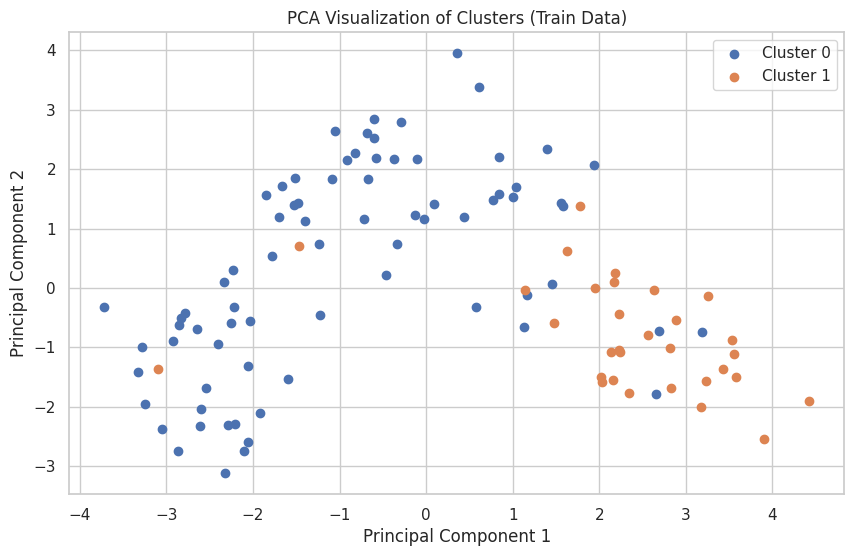

In [53]:
plt.figure(figsize=(10, 6))
for cluster in range(optimal_n_clusters):
    plt.scatter(X_train_pca[train_cluster_labels == cluster, 0],
                X_train_pca[train_cluster_labels == cluster, 1],
                label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters (Train Data)')
plt.legend()
plt.show()

Loss Function => Silhouette Score (Cluster Validity Index)

In [54]:
train_silhouette_score = silhouette_score(X_train, train_cluster_labels)
val_silhouette_score = silhouette_score(X_val, val_cluster_labels)
test_silhouette_score = silhouette_score(X_test, test_cluster_labels)

print(f"Train Silhouette Score: {train_silhouette_score}")
print(f"Validation Silhouette Score: {val_silhouette_score}")
print(f"Test Silhouette Score: {test_silhouette_score}")

Train Silhouette Score: 0.6638732476780168
Validation Silhouette Score: 0.6282395897210128
Test Silhouette Score: 0.6395198307217692


# 2. DBSCAN

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [56]:
X = df.values
X_train, X_temp, _, _ = train_test_split(X, X, test_size=0.4, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

Optimal Epsilon Determination

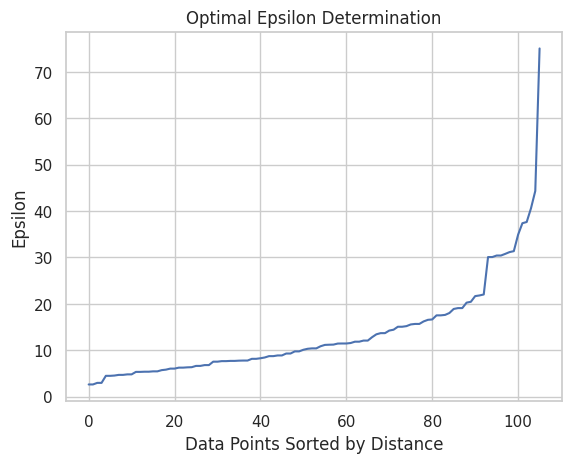

In [57]:
nearest_neighbors = NearestNeighbors(n_neighbors=2)
nearest_neighbors.fit(X_train)
distances, indices = nearest_neighbors.kneighbors(X_train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Epsilon')
plt.title('Optimal Epsilon Determination')
plt.show()

In [58]:
!pip install --upgrade kneed

In [59]:
from kneed import KneeLocator
kneedle = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
optimal_index = kneedle.elbow
epsilon = distances[optimal_index]

In [60]:
print(epsilon)

31.36365412384214


In [61]:
dbscan = DBSCAN(eps=epsilon)
train_cluster_labels = dbscan.fit_predict(X_train)
val_cluster_labels = dbscan.fit_predict(X_val)
test_cluster_labels = dbscan.fit_predict(X_test)

PCA Visualization

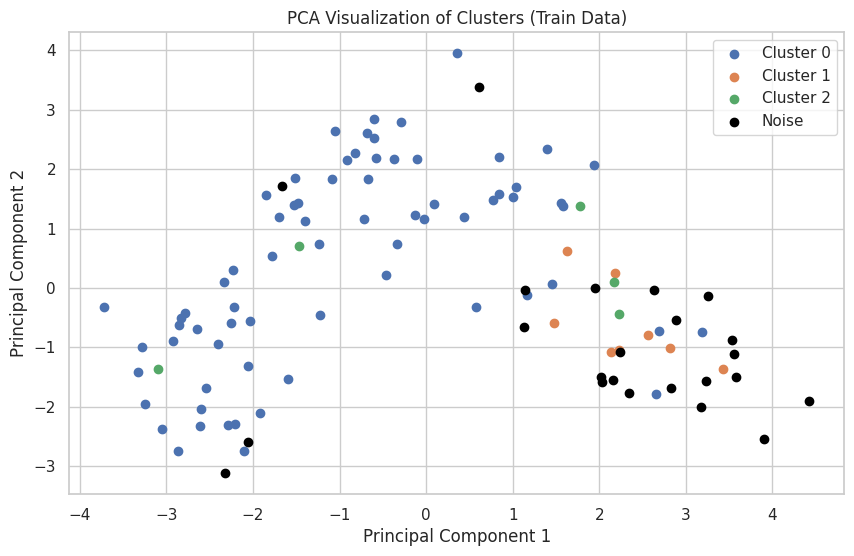

In [62]:
plt.figure(figsize=(10, 6))
for cluster in np.unique(train_cluster_labels):
    if cluster != -1:
        plt.scatter(X_train_pca[train_cluster_labels == cluster, 0],
                    X_train_pca[train_cluster_labels == cluster, 1],
                    label=f'Cluster {cluster}')
plt.scatter(X_train_pca[train_cluster_labels == -1, 0],
            X_train_pca[train_cluster_labels == -1, 1],
            color='black', label='Noise')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters (Train Data)')
plt.legend()
plt.show()

# 3. Hierarchical Cluster Analysis

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [64]:
X = df.values
X_train, X_temp, _, _ = train_test_split(X, X, test_size=0.4, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

Find the optimal number of clusters

In [65]:
silhouette_scores = []
for n_clusters in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

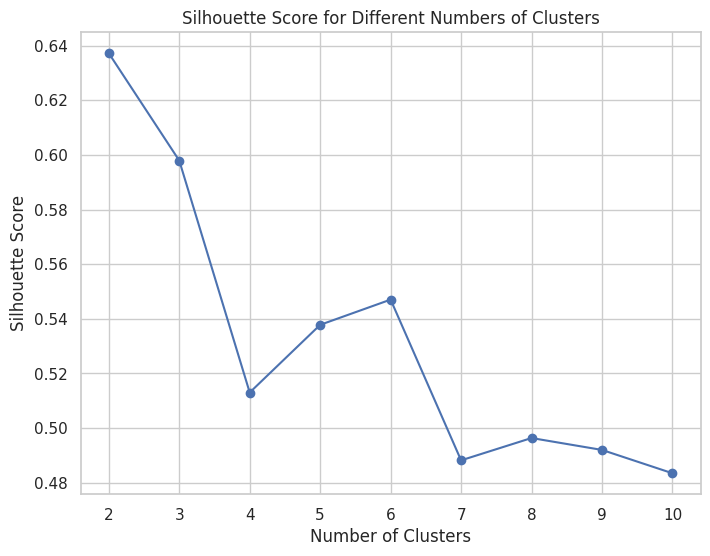

In [66]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [67]:
optimal_n_clusters = np.argmax(silhouette_scores) + 2

In [68]:
print(optimal_n_clusters)

2


In [69]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters)
train_cluster_labels = agg_clustering.fit_predict(X_train)
val_cluster_labels = agg_clustering.fit_predict(X_val)
test_cluster_labels = agg_clustering.fit_predict(X_test)

PCA Visualization

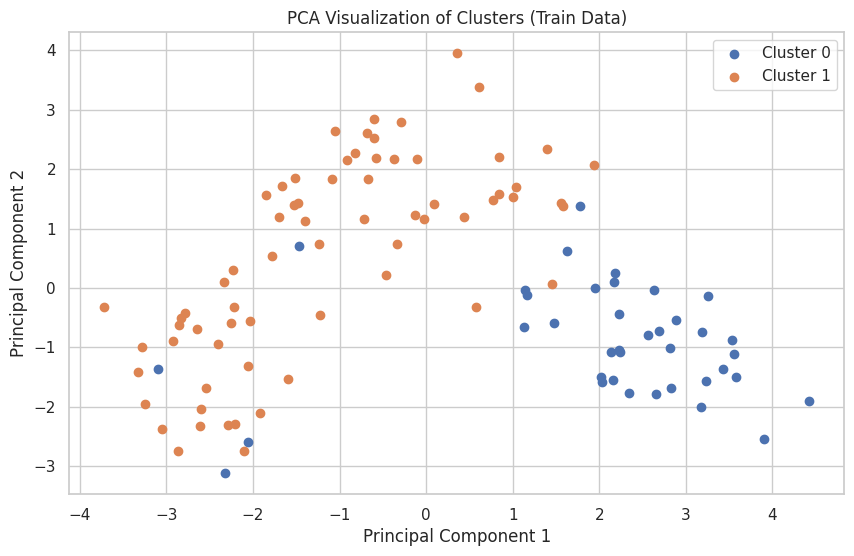

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(optimal_n_clusters):
    plt.scatter(X_train_pca[train_cluster_labels == cluster, 0],
                X_train_pca[train_cluster_labels == cluster, 1],
                label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters (Train Data)')
plt.legend()
plt.show()

Loss Function => Silhouette Score (Cluster Validity Index)

In [71]:
train_silhouette_score = silhouette_score(X_train, train_cluster_labels)
val_silhouette_score = silhouette_score(X_val, val_cluster_labels)
test_silhouette_score = silhouette_score(X_test, test_cluster_labels)

print(f"Train Silhouette Score: {train_silhouette_score}")
print(f"Validation Silhouette Score: {val_silhouette_score}")
print(f"Test Silhouette Score: {test_silhouette_score}")

Train Silhouette Score: 0.6372433521679783
Validation Silhouette Score: 0.6621683233888539
Test Silhouette Score: 0.6395198307217692
